In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
import time

t1 = time.time()
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
t2 = time.time()
print('Loading time', t2-t1)


Loading time 17.791662216186523


In [2]:
print(X.shape)  # object with shape 70000 * 784 pixel
print(y.shape)  # answer of x

(70000, 784)
(70000,)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, test_size=0.14, random_state=21)

In [4]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_train[0])
print(type(Y_train[0]))

(60199, 784)
(9801, 784)
(60199,)
6
<class 'str'>


This part below use to show image

1


Text(0.5, 1.0, '1')

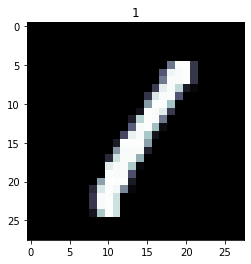

In [5]:
i = 3
plt.imshow(X[i,:].reshape((28,28)), cmap=plt.cm.bone)
print(y[i])
plt.title(f'{y[i]}')

In [6]:
np.unique(Y_train)  # show all unque number of y_train = have 0-9 

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [7]:
import importantFunction as imf

Yc_train = imf.onehot(Y_train.reshape((-1,1)).astype(int))
print(Y_train[:5])
print(Yc_train[:5,:])

['6' '6' '3' '9' '0']
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [8]:
import importlib
importlib.reload(imf)

<module 'importantFunction' from 'd:\\Github\\ANN_year4term1\\Assignment_2\\FinalWork\\importantFunction.py'>

In [9]:
Xn_train = X_train/255  # reformat colour value from 1-255 to be only 0-1 
print(np.min(Xn_train))
print(np.max(Xn_train))

0.0
1.0


Text(0.5, 1.0, 'y = 9')

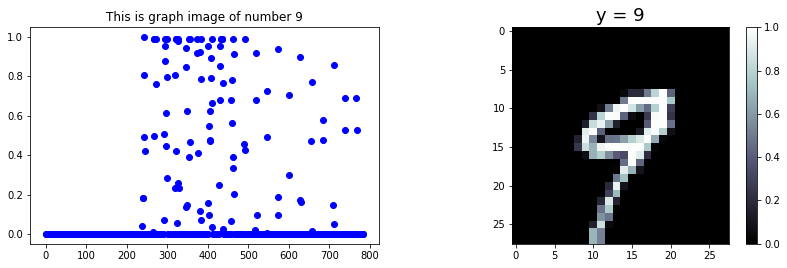

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(rect=[0.1, 0.1, 2, 1], h_pad=6, w_pad=4)  # 4 เหลี่ยม เริ่ม 0.1 0.1 กว้างจบ 2 สูงจบ 1

i = 5
plt.subplot(1,2,1)  # ตัวแยกกราฟ ซ้าย ขวา 1, 2, 1 คือตาราง 1*2 อยู่ 1
plt.plot(Xn_train[i,:], 'bo')  # x ตำแหน่งที่ i และค่าสีทั้งหมดของมัน
plt.title('This is graph image of number {}'.format(Y_train[i]))

plt.subplot(1,2,2)  # ตัวแยกกราฟ ซ้าย ขวา 1, 2, 1 คือตาราง 1*2 อยู่ 
s = plt.imshow(Xn_train[i,:].reshape((28,28)), cmap=plt.cm.bone)
plt.colorbar(s)
plt.title('y = {}'.format(Y_train[i]), fontsize=18)

In [27]:
import importlib
importlib.reload(imf)

<module 'importantFunction' from 'd:\\Github\\ANN_year4term1\\Assignment_2\\FinalWork\\importantFunction.py'>

sample: 0
AAA
(60199,)
AAA
(60199,)
AAA
(60199,)
AAA
(60199,)
AAA
(60199,)
AAA
(60199,)
AAA
(60199,)
AAA
(60199,)
AAA
(60199,)
AAA
(60199,)
Time spent: 0.9074335098266602
All Accuracy

[0.1333]
highest: 13.33% || lowest: 13.33%
---------------------------------------------
LR1: 1 || LR2: 1 || HU: 2 || epochs: 10 || sample: 1
AVG accuracy = 13.33%
Took 0.92 seconds


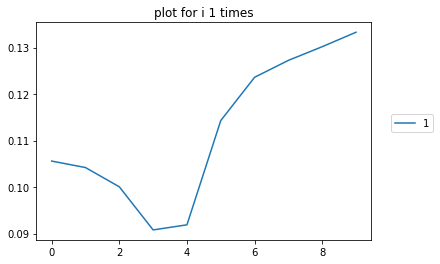

In [28]:
# Choose hyper-parameter, then initialize and train the network.
N, D = Xn_train.shape  # (60199, 784)
_, K = Yc_train.shape  # (60199, 10)

# number of HUs hidden unit (hyper-parameter), 
lr1Mul= 1
lr2Mul= 1

sample = 1
all_accuracy_list = []

all_t1 = time.time()

for i in range(sample):
    print(f"sample: {i}")

    M = 2
    epochs = 10

    # Biases and weights (parameters)
    c = np.random.normal(0, 1, K).reshape((K,1))   # 10*1
    v = np.random.normal(0, 1, K*M).reshape((K,M))  # 10*8
    b = np.random.normal(0, 1, M).reshape((M,1))  # 8*1
    w = np.random.normal(0, 1, M*D).reshape((M,D))  # 8*784

    lr1 = (1/N) * lr1Mul
    lr2 = (1/N) * lr2Mul

    oldy = Y_train.astype(int)

    t1 = time.time()
    cc, vv, bb, ww, train_loss, accuracy_end = imf.train_mlp2(c, v, b, w, Xn_train, Yc_train, lr1, lr2, epochs, oldy, imf.softmax, imf.cc_entropy)
    t2 = time.time()

    print('Time spent:', t2 - t1)
    all_accuracy_list.append(accuracy_end[-1])

    # save file
    net = {'c': cc, 'v': vv, 'b': bb, 'w': ww}
    np.save(f'{i}-{accuracy_end[-1]:.4f}', net)

    plt.plot(accuracy_end, label=i+1)
    plt.legend(bbox_to_anchor=(1.2, 0.6))
    plt.title(f'plot for i {sample} times')

all_t2 = time.time()
formattedList = ["%.4f" % member for member in all_accuracy_list]
float_list = list(map(float, formattedList))
print("All Accuracy")
print()
print(float_list)
print(f"highest: {(np.max(float_list))*100}% || lowest: {(np.min(float_list))*100}%")
print("---------------------------------------------")
print(f'LR1: {lr1Mul} || LR2: {lr2Mul} || HU: {M} || epochs: {epochs} || sample: {sample}')
print(f"AVG accuracy = {(np.average(all_accuracy_list))*100:.2f}%")
print(f'Took {all_t2 - all_t1:.2f} seconds')

In [16]:
oldy.T.shape

(60199,)

sample: 0
Time spent: 203.614985704422
sample: 1
Time spent: 202.80080199241638
sample: 2
Time spent: 208.818989276886
sample: 3
Time spent: 203.2202503681183
sample: 4
Time spent: 203.497554063797
sample: 5
Time spent: 202.28020310401917
sample: 6
Time spent: 202.79437160491943
sample: 7
Time spent: 199.72739815711975
sample: 8
Time spent: 197.55331563949585
sample: 9
Time spent: 197.85361981391907
All Accuracy

[0.9415, 0.9385, 0.9337, 0.9329, 0.9432, 0.9322, 0.9324, 0.9383, 0.9342, 0.934]
highest: 94.32000000000001% || lowest: 93.22%
---------------------------------------------
LR: 10 || HU: 20 || epochs: 800 || sample: 10
AVG accuracy = 93.61%
Took 2022.26 seconds


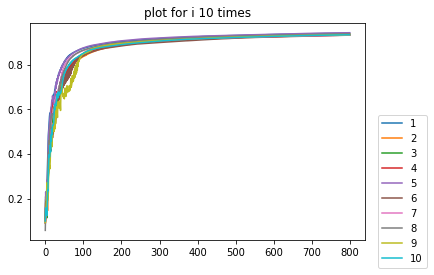

In [ ]:
# Choose hyper-parameter, then initialize and train the network.
N, D = Xn_train.shape  # (60199, 784)
_, K = Yc_train.shape  # (60199, 10)

# number of HUs hidden unit (hyper-parameter), 
lr1Mul= 10
lr2Mul= 10

sample = 10
all_accuracy_list = []

all_t1 = time.time()

for i in range(sample):
    print(f"sample: {i}")

    M = 20
    epochs = 800

    # Biases and weights (parameters)
    c = np.random.normal(0, 1, K).reshape((K,1))   # 10*1
    v = np.random.normal(0, 1, K*M).reshape((K,M))  # 10*8
    b = np.random.normal(0, 1, M).reshape((M,1))  # 8*1
    w = np.random.normal(0, 1, M*D).reshape((M,D))  # 8*784

    lr1 = (1/N) * lr1Mul
    lr2 = (1/N) * lr2Mul

    oldy = Y_train.astype(int)

    t1 = time.time()
    cc, vv, bb, ww, train_loss, accuracy_end = imf.train_mlp2(c, v, b, w, Xn_train, Yc_train, lr1, lr2, epochs, oldy, imf.softmax, imf.cc_entropy)
    t2 = time.time()

    print('Time spent:', t2 - t1)
    all_accuracy_list.append(accuracy_end[-1])

    # save file
    net = {'c': cc, 'v': vv, 'b': bb, 'w': ww}
    np.save(f'{i}-{accuracy_end[-1]:.4f}', net)

    plt.plot(accuracy_end, label=i+1)
    plt.legend(bbox_to_anchor=(1.2, 0.6))
    plt.title(f'plot for i {sample} times')

all_t2 = time.time()
formattedList = ["%.4f" % member for member in all_accuracy_list]
float_list = list(map(float, formattedList))
print("All Accuracy")
print()
print(float_list)
print(f"highest: {(np.max(float_list))*100}% || lowest: {(np.min(float_list))*100}%")
print("---------------------------------------------")
print(f'LR1: {lr1Mul} || LR2: {lr2Mul} || HU: {M} || epochs: {epochs} || sample: {sample}')
print(f"AVG accuracy = {(np.average(all_accuracy_list))*100:.2f}%")
print(f'Took {all_t2 - all_t1:.2f} seconds')

In [ ]:

print(f"AVG accuracy = {(np.average(all_accuracy_list))*100:.2f}%")

AVG accuracy = nan%


In [ ]:
# Test network

Xn_test  = X_test/255

Yp = imf.mlp2(cc, vv, bb, ww, Xn_test, imf.softmax)
predicted_classes = np.argmax(Yp, axis=1)

test_acc = np.mean(predicted_classes == Y_test.astype(int))
print('Test accuracy', test_acc)

Test accuracy 0.9232731353943475


(10, 1)
(10, 20)
(20, 1)
(20, 784)


Text(0.5, 1.0, 'w')

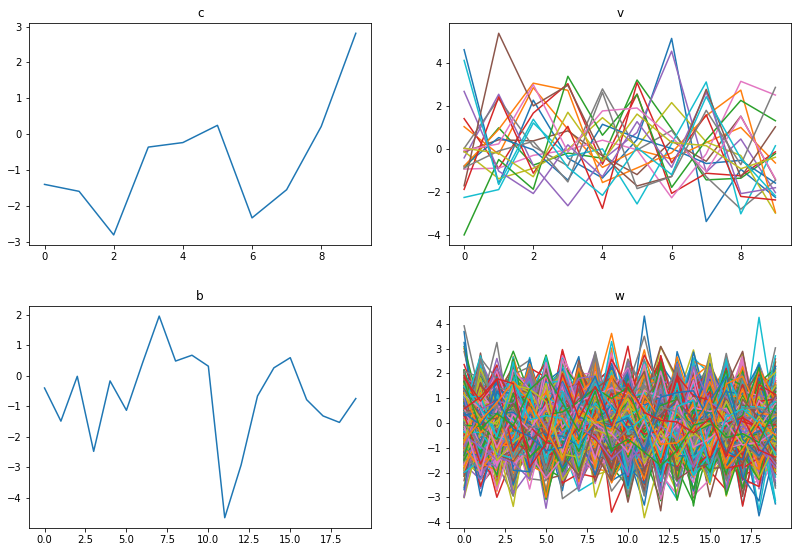

In [ ]:
print(cc.shape)
print(vv.shape)
print(bb.shape)
print(ww.shape)

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout(rect=[0.1, 0.1, 2, 2], h_pad=4, w_pad=4)

plt.subplot(2,2,1)
plt.plot(cc)
plt.title('c')

plt.subplot(2,2,2)
plt.plot(vv)
plt.title('v')

plt.subplot(2,2,3)
plt.plot(bb)
plt.title('b')

plt.subplot(2,2,4)
plt.plot(ww)
plt.title('w')

In [ ]:
net = {'c': cc, 'v': vv, 'b': bb, 'w': ww}
np.save('82-73special_test_better.npy', net)

In [ ]:
# Test if it can be loaded ok

loaded_net = np.load('0-0.9415.npy', allow_pickle=True)
print(type(loaded_net))

lnet = loaded_net.tolist()
print(type(lnet))

print(lnet['c'].shape)
print(lnet['v'].shape)
print(lnet['b'].shape)
print(lnet['w'].shape)



<class 'numpy.ndarray'>
<class 'dict'>
(10, 1)
(10, 20)
(20, 1)
(20, 784)


In [ ]:
loaded_net = np.load('0-0.9415.npy', allow_pickle=True)
lnet = loaded_net.tolist()

Yp = imf.mlp2(lnet['c'], lnet['v'], lnet['b'], lnet['w'], Xn_test, imf.softmax)
predicted_classes = np.argmax(Yp, axis=1)
test_acc = np.mean(predicted_classes == Y_test.astype(int))

print(f'Test accuracy {test_acc*100:.2f}%')


Test accuracy 93.00%


In [ ]:
Yp = imf.mlp2(lnet['c'], lnet['v'], lnet['b'], lnet['w'], Xn_test, imf.softmax)
predicted_classes = np.argmax(Yp, axis=1)
test_acc = np.mean(predicted_classes == Y_test.astype(int))
print('Test accuracy', test_acc)


Test accuracy 0.9300071421283542


Confusion matrix

Text(0.5, 1.0, 'Confusion Matrix')

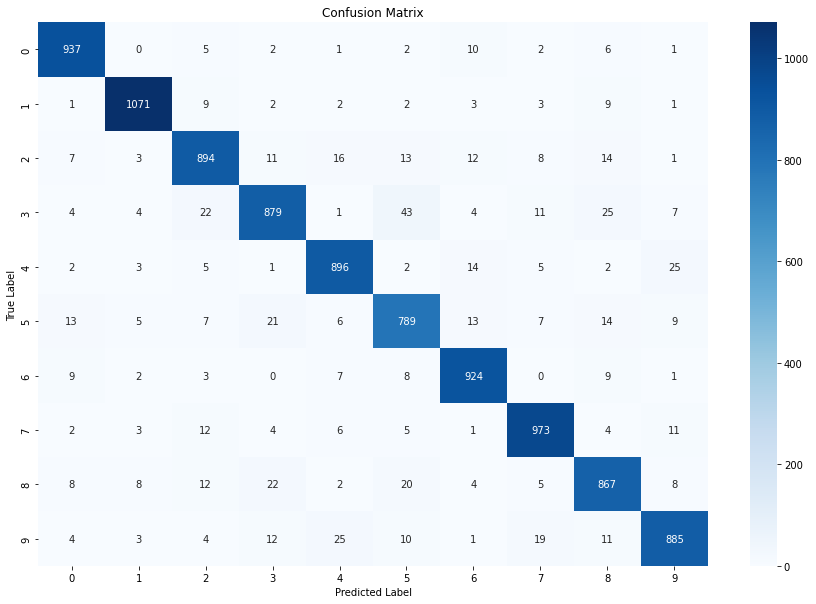

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Yp = imf.mlp2(lnet['c'], lnet['v'], lnet['b'], lnet['w'], Xn_test, imf.softmax)

y_predict = np.argmax(Yp, axis=1)
y_true = Y_test.astype(int)
confusion_matrix = confusion_matrix(y_true, y_predict)
# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_matrix, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

In [ ]:
print(confusion_matrix)

[[ 937    0    5    2    1    2   10    2    6    1]
 [   1 1071    9    2    2    2    3    3    9    1]
 [   7    3  894   11   16   13   12    8   14    1]
 [   4    4   22  879    1   43    4   11   25    7]
 [   2    3    5    1  896    2   14    5    2   25]
 [  13    5    7   21    6  789   13    7   14    9]
 [   9    2    3    0    7    8  924    0    9    1]
 [   2    3   12    4    6    5    1  973    4   11]
 [   8    8   12   22    2   20    4    5  867    8]
 [   4    3    4   12   25   10    1   19   11  885]]
